<h1><span style="color:blue">Actividad Reto</h1>
<h4>
<span style="color:green">
Fernando Alfonso Arana Salas A01272933<br>
Paola Fernández Gutiérrez Zamora A01658087<br>
Sofia Donlucas Bañuelos A01655565<br>
Isaac Jacinto Ruiz A01658578<br>
Santiago Gabián A01658280
</h4>

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

!pip install plotly
import plotly.express as px 

warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('covid19_tweets.csv')
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [3]:
data.columns



Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [4]:
data.info

<bound method DataFrame.info of                      user_name               user_location  \
0                       ᏉᎥ☻լꂅϮ                  astroworld   
1                Tom Basile 🇺🇸                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ⏳                   🇨🇦 Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  \
0       wednesday addams as a disney princess keepin i...   
1       Husband, Father, Columnist & Commentator. Auth...   
2       #Christian #Catholic #Conservati

In [5]:
data['user_location'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Buffer', 'TweetDeck', 'Twitter for iPad', 'Africa Newsroom',
       'Blood Donors India', 'TweetCaster for Android',
       'Alexander Higgins', 'IFTTT', 'Hootsuite Inc.', 'Sprout Social',
       'Sprinklr', 'assarofficial', 'IAMBLOG2TWITTER', 'CrowdControlHQ',
       'COVID19-Updates', 'EveryoneSocial', 'Dynamic Signal', 'Instagram',
       'TweetCaster for iOS', 'GlobalPandemic.NET', 'Venrap Radio',
       'HeyOrca', 'Twitter for Advertisers', 'Paper.li',
       'Twitter Media Studio', 'Twitter for Mac', 'dlvr.it',
       'Cheap Bots, Done Quick!', 'Prof. Shanku', 'LaterMedia',
       'SEMrush Social Media Tool', 'Twitterrific for iOS',
       "Sebastian's Twitter Bot", 'Threader_client', 'COVID19FactoidBot',
       'PwC UK SMART', 'tweet pro stiff', 'UK COVID-19 Alerts',
       'Resistbot Open Letters', 'preprint-alert', 'ContentStudio.io',
       'Peeping Moon', 'TweetAutomaticos', 'Orlo', 'AgoraPulse Ma

# </br> </br> Gráfica: Distribución de Orígenes </br> </br>

In [6]:
# Distribution of Sources
data['user_location'].value_counts()

Twitter Web App              56891
Twitter for Android          40179
Twitter for iPhone           35472
TweetDeck                     8543
Hootsuite Inc.                7321
                             ...  
DataBlogger                      1
Dear_Assistant                   1
OnlyPultCom                      1
Washington Square Parkerz        1
Radiology: AI app                1
Name: source, Length: 610, dtype: int64

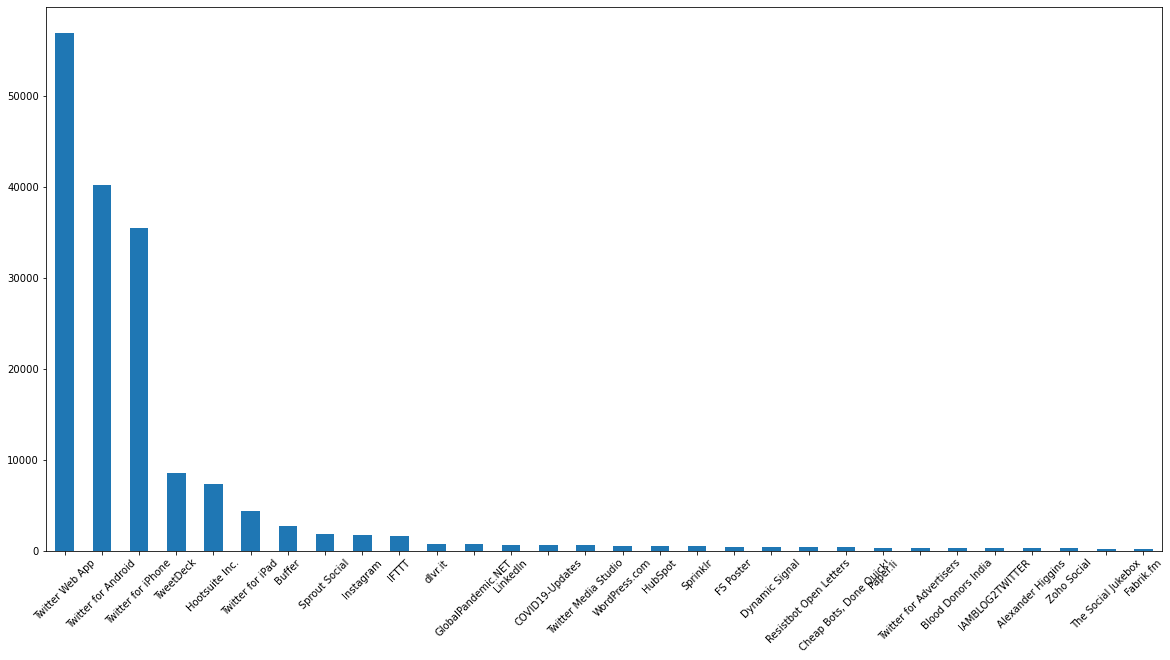

In [7]:
plt.figure(figsize=(20,10))
data['source'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [8]:
data.drop(['user_description'],inplace = True, axis = 1)
data

,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [9]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.corpus import subjectivity
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from textblob import TextBlob

%matplotlib inline

# text cleaner
# turns \n, \t, \r into normal white spaces
# removes retweets, hyperlinks and non-alphanumeric values
# also, removes leading and trailing white spaces
def text_cleaner(text) :
    text = re.sub(r"\n"," ",text)
    text = re.sub(r"\t"," ",text)
    text = re.sub(r"\r"," ",text)
    text = re.sub(r"(@)|(#)|(RT[\s]+)|(https?:\/\/\S+)|([^a-zA-Z0-9 -])", "", text)
    text = text.strip(" ")
    return text

# Covid_or_Coronavirus_remover
# removes words containing covid or corona
# also, removes leading and trailing white spaces
def Covid_or_Coronavirus_remover(text) :
    text = re.sub(r"((Covid)|(COVID)|(covid)|(Corona)|(corona)|(CORONA))+", "",text)
    text = re.sub(r"((Covid)|(COVID)|(covid)|(Corona)|(corona)|(CORONA))[A-Za-z0-9]+", "",text)
    text = text.strip(" ")
    return text

# hashtag collector
# finds all hashtags and puts them into a list
# removes # and . symbols to clean up list
# changes all hashtags to uppercase 
def hashtag_collector(text) :
    list_of_hashtags = re.findall(r"#[A-Za-z0-9\-\.\_]+",text,re.DOTALL)
    if(list_of_hashtags != None) :
        list_of_hashtags = [word.replace('#', '') for word in list_of_hashtags]
        list_of_hashtags = [word.replace('.', '') for word in list_of_hashtags]
        list_of_hashtags = [word.upper() for word in list_of_hashtags]
    return list_of_hashtags

# at collector
# finds all mentions and puts them into a list
# removes @ symbols to clean up list
def at_collector(text) :
    list_of_ats = re.findall(r"@[A-Za-z0-9\-\.\_]+",text,re.DOTALL)
    if(list_of_ats != None) :
        list_of_ats = [name.replace('@', '') for name in list_of_ats]
    return list_of_ats

# compound sentiment score
# returns Vader sentiment polarity scores 
def compound_sentiment_score(tweet):
    VaderSent = SIA()
    Overall_sentiment = VaderSent.polarity_scores(tweet)
    return Overall_sentiment

# getSubjectivity
# returns TextBlob subjectivity score
def getSubjectivity(tweet):
    return TextBlob.subjectivity(tweet)

# getPolarity
# returns TextBlob polarity score
def getPolarity (tweet):
    return TextBlob.polarity(tweet)

# doAnalysis
# returns simple connotation
def doAnalysis(score) :
    return 'Neutral' if (score == 0) else ('Negative' if (score < 0) else 'Positive')

# wordClouder
# creates a word cloud
def wordClouder(string_column):
    Words = ''.join([words for words in string_column])
    wordcloud = WordCloud(width = 1000, height = 600, random_state = 10, max_font_size = 120)
    wordcloud.generate(Words)
    plt.style.use('fivethirtyeight')
    plt.figure(figsize = (20,28))
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis('off')
    plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Fer/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
data["hashtags_in_tweets"] = data["text"].apply(hashtag_collector)
data

,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,hashtags_in_tweets
0,ᏉᎥ☻լꂅϮ,astroworld,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,[]
1,Tom Basile 🇺🇸,"New York, NY",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,[]
2,Time4fisticuffs,"Pewee Valley, KY",2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,[COVID19]
3,ethel mertz,Stuck in the Middle,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,[COVID19]
4,DIPR-J&K,Jammu and Kashmir,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[CORONAVIRUSUPDATES, COVID19]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False,[WEARAMASK]
179104,Jason,Ontario,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False,[COVID19]
179105,BEEHEMOTH ⏳,🇨🇦 Canada,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False,[]
179106,Gary DelPonte,New York City,2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False,[COVID19]


In [11]:
data["ats_in_tweets"] = data["text"].apply(at_collector)
data

,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,hashtags_in_tweets,ats_in_tweets
0,ᏉᎥ☻լꂅϮ,astroworld,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,[],[]
1,Tom Basile 🇺🇸,"New York, NY",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,[],"[Yankees, YankeesPR, MLB]"
2,Time4fisticuffs,"Pewee Valley, KY",2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,[COVID19],"[diane3443, wdunlap, realDonaldTrump]"
3,ethel mertz,Stuck in the Middle,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,[COVID19],[brookbanktv]
4,DIPR-J&K,Jammu and Kashmir,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[CORONAVIRUSUPDATES, COVID19]","[kansalrohit69, DrSyedSehrish, airnewsalerts, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False,[WEARAMASK],"[IamOhmai, WHO, abdlbaasit_, hvbxxb]"
179104,Jason,Ontario,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False,[COVID19],[]
179105,BEEHEMOTH ⏳,🇨🇦 Canada,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False,[],[CTVNews]
179106,Gary DelPonte,New York City,2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False,[COVID19],[]


In [12]:
data["text"] = data["text"].apply(text_cleaner)
data

,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,hashtags_in_tweets,ats_in_tweets
0,ᏉᎥ☻լꂅϮ,astroworld,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,[],[]
1,Tom Basile 🇺🇸,"New York, NY",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey Yankees YankeesPR and MLB - wouldnt it hav...,NaN,Twitter for Android,False,[],"[Yankees, YankeesPR, MLB]"
2,Time4fisticuffs,"Pewee Valley, KY",2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,diane3443 wdunlap realDonaldTrump Trump never ...,['COVID19'],Twitter for Android,False,[COVID19],"[diane3443, wdunlap, realDonaldTrump]"
3,ethel mertz,Stuck in the Middle,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,brookbanktv The one gift COVID19 has give me i...,['COVID19'],Twitter for iPhone,False,[COVID19],[brookbanktv]
4,DIPR-J&K,Jammu and Kashmir,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July Media Bulletin on Novel CoronaVirusUp...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[CORONAVIRUSUPDATES, COVID19]","[kansalrohit69, DrSyedSehrish, airnewsalerts, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks IamOhmai for nominating me for the WHO ...,['WearAMask'],Twitter for Android,False,[WEARAMASK],"[IamOhmai, WHO, abdlbaasit_, hvbxxb]"
179104,Jason,Ontario,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020 The year of insanity Lol COVID19,['COVID19'],Twitter for Android,False,[COVID19],[]
179105,BEEHEMOTH ⏳,🇨🇦 Canada,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,CTVNews A powerful painting by Juan Lucena Its...,NaN,Twitter Web App,False,[],[CTVNews]
179106,Gary DelPonte,New York City,2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,More than 1200 students test positive for COVI...,['COVID19'],Twitter for iPhone,False,[COVID19],[]


# </br> </br> <center> Gráfica: Nube de palabras </center> </br>

## <center> Tweets </center> </br> </br>

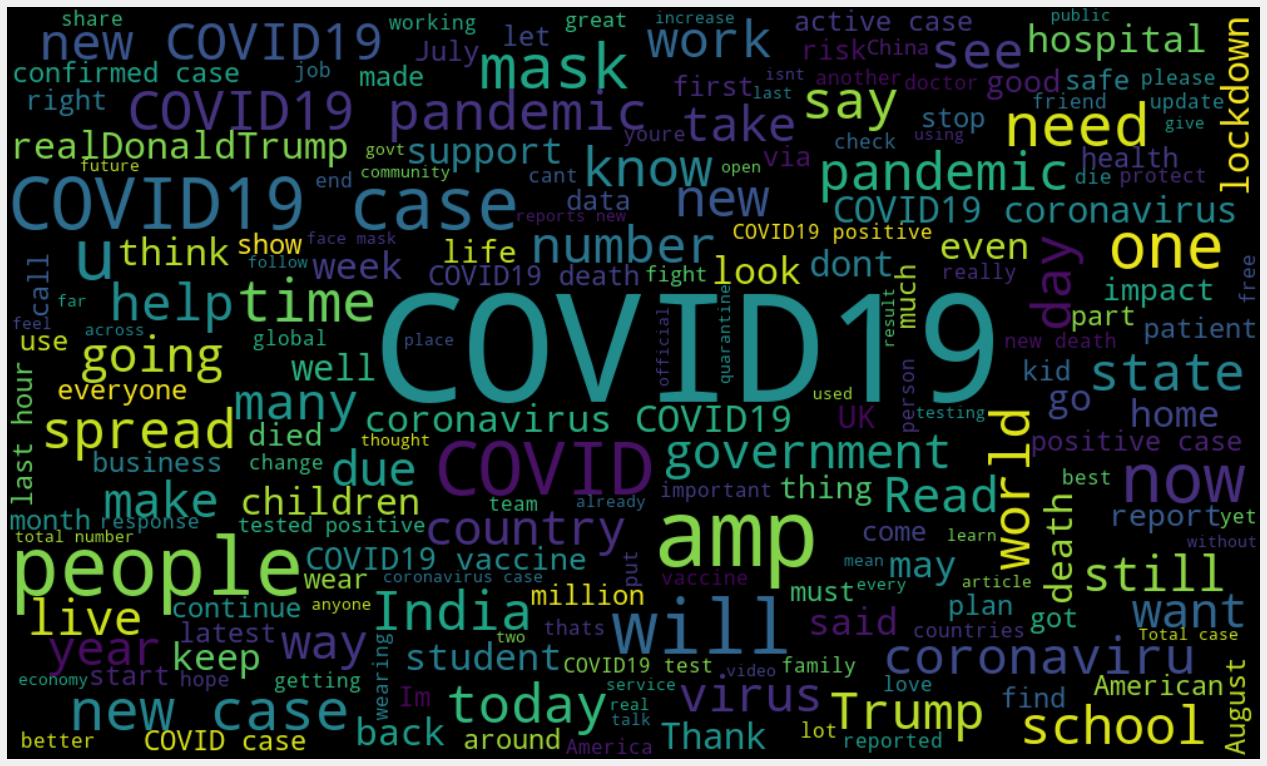

In [26]:
# Gráfica para identificar palabras en tweets
wordClouder(data['text'])

## <center> Hashtags </center> </br> </br>

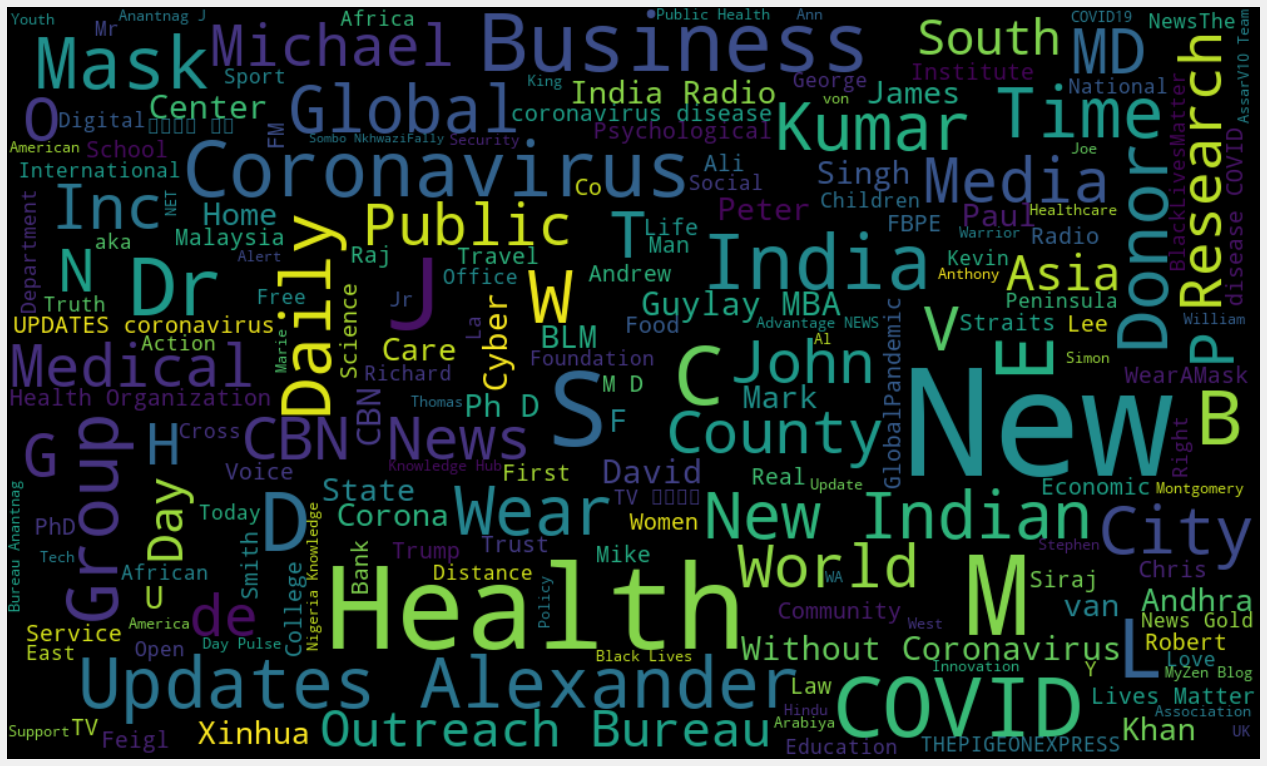

In [31]:
# Gráfica para identificar palabras en Nombres de Usuarios
wordClouder(data['user_name'])

In [14]:
data_new = pd.read_csv('covid19_tweets.csv')
data_new.drop(data_new.columns[[0, 1, 2, 3, 6, 7, 8, 9, 10, 11]], axis='columns')
data_new

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


# </br> </br> <center> Gráfica: Mapa de Arbol </center> </br> </br>

In [35]:
usuarios_conteo = data['user_name'].value_counts().reset_index().rename(columns={
    'user_name':'Numero_de_Tweets','index':'Usuario'})

fig = px.treemap(usuarios_conteo.head(50), path=['Usuario'], values='Numero_de_Tweets',
                title="<b>Top 50 usuarios por número de tweets</b>") 

fig.show()

# </br> </br><center>Análisis con K-means </center></br> </br>

¿Es posible incluir el uso del algoritmo Kmeans para apoyar con la descripción de los datos?
Basado en los datos que se tienen, consideramos que si es posible utilizar un diagrama K-means para apoyar con la descripción de datos. Observamos que es posible comparar los seguidores que tiene un usuario, sus amigos y sus favoritos y encontrar si hay alguna relación con que su cuenta esté verificada. Esto puede servir para determinar si la verificación de una cuenta se ve afectada por estos datos y así determinar si esa verificación en realidad significa que sus tweets son información verídica y significativa o no si no lo asegura. Aunque en este caso se hizo este ejemplo se podrían analizar otros valores para encontrar diferentes grupos significativos por la información obtenida ya que el método k-means ayuda a estudiar comportamientos en páginas web entonces podría ser útil en este caso.

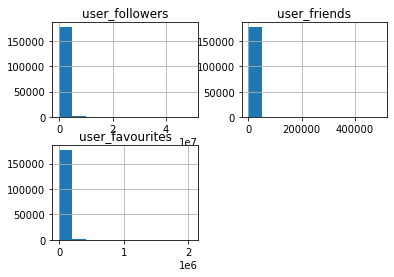

In [13]:
# Se realizará analizando los usuarios verificados
data.drop(['user_verified'],1).hist()
plt.show()

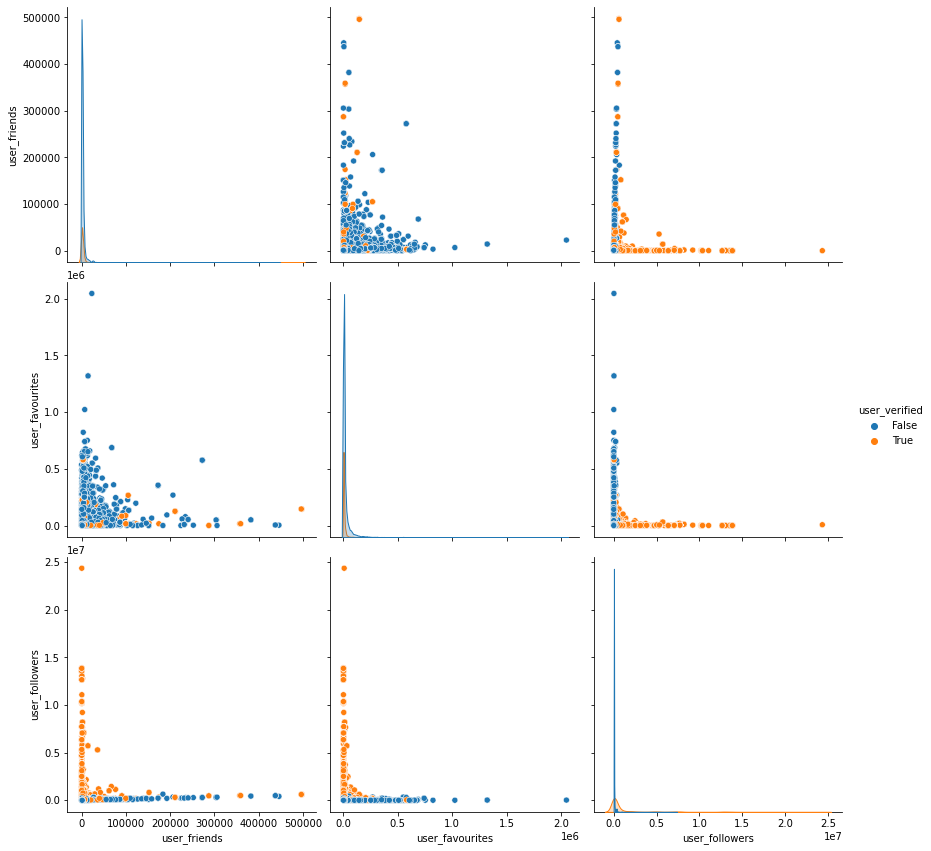

In [12]:
sns.pairplot(data.dropna(), hue='user_verified',size=4,vars=["user_friends","user_favourites","user_followers"],kind='scatter')

In [17]:
# Se utilizarán los valores numéricos y se hará de 3 dimensiones
X = np.array(data[["user_friends","user_favourites","user_followers"]])
y = np.array(data['user_verified'])
X.shape

array([False,  True, False, ..., False, False, False])

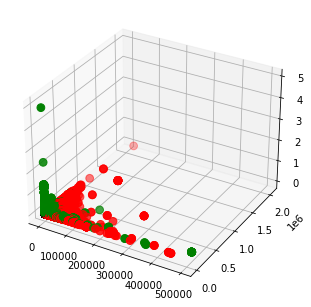

In [18]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['red', 'green']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)


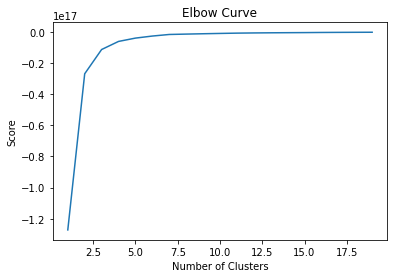

[[2.13836740e+03 1.45774127e+04 3.20424443e+04]
 [2.40845960e+02 1.23171717e+02 1.31393268e+07]
 [6.64066007e+02 2.59558086e+03 5.71070570e+06]]


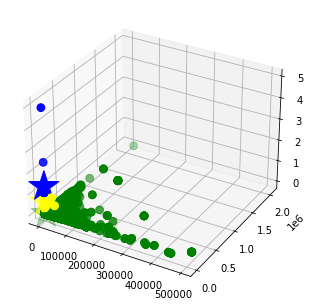

In [39]:
# Obteniendo el valor K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Ejecutando K-Means para 3 clusters
kmeans = KMeans(n_clusters=3).fit(X)

# Obteniendo etiquetas y centroids
centroids = kmeans.cluster_centers_
print(centroids)

# Grafica 3D - estrellas marcan el centro
# Prediccion de clusters
labels = kmeans.predict(X)
# Obteniendo los centros de los clusters
C = kmeans.cluster_centers_
colores=['green','blue','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)


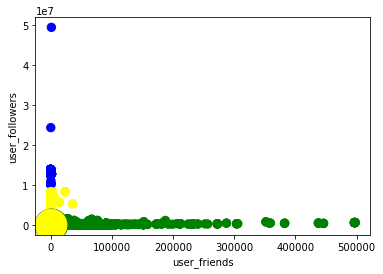

[[2.13836740e+03 1.45774127e+04 3.20424443e+04]
 [2.40845960e+02 1.23171717e+02 1.31393268e+07]
 [6.64066007e+02 2.59558086e+03 5.71070570e+06]]


In [40]:
friends = data['user_friends'].values
followers = data['user_followers'].values

plt.figure()
plt.scatter(friends, followers, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], c=colores, s=1000)
plt.xlabel('user_friends')
plt.ylabel('user_followers')
plt.show()
print(C)

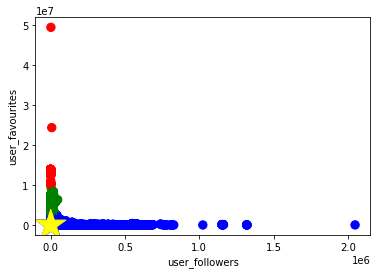

In [29]:
import random
favourites = data['user_favourites'].values
followers = data['user_followers'].values

plt.xlabel('user_followers')
plt.ylabel('user_favourites')
plt.scatter(favourites, followers, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], marker="*", c=colores, s=1000)
plt.show()

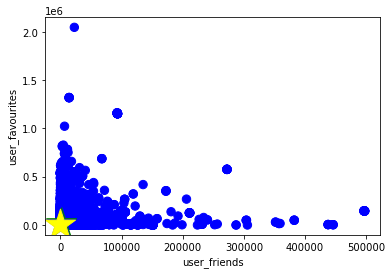

In [31]:
friends = data['user_friends'].values
favourites = data['user_favourites'].values

plt.scatter(friends, favourites, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], marker="*", c=colores, s=1000)
plt.xlabel('user_friends')
plt.ylabel('user_favourites')
plt.show()

In [41]:
copy =  pd.DataFrame()

copy['user_verified']=data['user_verified'].values
copy['label'] = labels
cantGrp =  pd.DataFrame()
cantGrp['color']=colores
cantGrp['cantidad']=copy.groupby('label').size()
cantGrp

,color,cantidad
0,green,177197
1,blue,396
2,yellow,1515
